In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data from excel
raw_data = pd.read_excel('cookie_compliance_data.xlsx')
df = raw_data.copy()

In [3]:
print(df.head(3))

   Cookie ID          Cookie Name          Domain  \
0          1  Chocolate Crinkle_2     spxflow.com   
1          2          Nankhatai_1     hitachi.com   
2          3    Chocolate Wafer_6  electrolux.com   

   Expires / Max-Age (in seconds)       Origin  \
0                        60478299  First-party   
1                               0  First-party   
2                              -1  First-party   

   SameParty (if cookie keeps data locally or sends it outside)     Purpose  \
0                                               True             Functional   
1                                               True              Analytics   
2                                               True             Functional   

                                     Data Collected   Secure  HttpOnly  ...  \
0  Network Type; IP Address; Referring URL; Adver...   False      True  ...   
1  Advertising Preferences; Device Information; V...   False     False  ...   
2  Flash Version; Referring URL;

In [4]:
# Dropping irrelevant fields
df.drop(['Cookie Name','Domain','Secure', 'HttpOnly', 'Cookie Banner', 'SameSite', 'Path', 'Priority', 'Partitioned','Creation Date', 'Last Accessed', 'Size (KB)', 'Host Only'], axis = 1, inplace = True)

In [5]:
df.head()

,Cookie ID,Expires / Max-Age (in seconds),Origin,SameParty (if cookie keeps data locally or sends it outside),Purpose,Data Collected,Cookie Policy,Cookie Options,Consent Required,Duration
0,1,60478299,First-party,True,Functional,Network Type; IP Address; Referring URL; Adver...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Persistent
1,2,0,First-party,True,Analytics,Advertising Preferences; Device Information; V...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Accept All, Customize cookies",True,Persistent
2,3,-1,First-party,True,Functional,Flash Version; Referring URL; Operating System...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Session
3,4,0,First-party,True,Service Improvement,Browser; Language Preferences; Download Histor...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Session
4,5,0,First-party,True,Content Customization,Network Type; Visited Pages; Error Reports; Fl...,Cookie Policy\n\nIntroduction\nWe use cookies ...,Accept All,True,Session


In [6]:
# checking for duplicates
df.duplicated().sum()

0

In [7]:
# checking for nulls
df.isnull().sum()

Cookie ID                                                        0
Expires / Max-Age (in seconds)                                   0
Origin                                                           0
SameParty (if cookie keeps data locally or sends it outside)     0
Purpose                                                          0
Data Collected                                                   0
Cookie Policy                                                    0
Cookie Options                                                  66
Consent Required                                                 0
Duration                                                         0
dtype: int64

In [8]:
# Rows where 'Cookie Options' is empty:
df[df['Cookie Options'].isna()]

,Cookie ID,Expires / Max-Age (in seconds),Origin,SameParty (if cookie keeps data locally or sends it outside),Purpose,Data Collected,Cookie Policy,Cookie Options,Consent Required,Duration
21,22,56396466,First-party,False,Market Research,Email Address; ISP; Device Information; Login ...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Persistent
60,61,0,First-party,False,Customer Support,Session Data; Subscription Status; Payment Inf...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Session
66,67,-1,First-party,True,Operational Efficiency,Network Type; Purchase History; Screen Resolut...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Session
73,74,3915088,Third-party,True,Customer Support,Email Address; Flash Version; Visited Pages; E...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Session
77,78,6276421,First-party,True,Compliance,JavaScript Enabled; Session Data; Screen Resol...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Persistent
...,...,...,...,...,...,...,...,...,...,...
695,696,0,Third-party,True,Service Improvement,Device Information; Session Data; Language Pre...,No policy informed,NaN,True,Persistent
726,727,0,First-party,True,Customer Feedback,Battery Level; Search Queries; Purchase Histor...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Session
727,728,25184472,First-party,True,User Experience,Search Queries; JavaScript Enabled; Email Addr...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,True,Session
734,735,61850003,First-party,True,Functional,ISP; JavaScript Enabled; Language Preferences;...,Cookie Policy\n\nIntroduction\nWe use cookies ...,NaN,False,Persistent


In [9]:
# cookies expiration period converted from seconds to years
df['expires/max-age (in years)'] = (((df['Expires / Max-Age (in seconds)']/60)/60)/24)/365

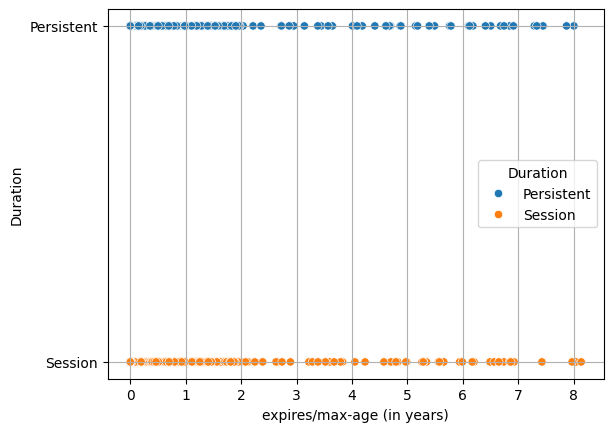

In [10]:
# Relation between Duration vs the expiration time
sns.scatterplot(data= df, x= 'expires/max-age (in years)', y = 'Duration', hue='Duration')
plt.grid(True)
plt.show()

In [11]:
# cookies with expiration year >= 2 years
df['expiration year > 2'] = (df['expires/max-age (in years)'] >= 2)
(df['expiration year > 2']== True).value_counts()

expiration year > 2
False    654
True      96
Name: count, dtype: int64

In [12]:
df.head(3)

,Cookie ID,Expires / Max-Age (in seconds),Origin,SameParty (if cookie keeps data locally or sends it outside),Purpose,Data Collected,Cookie Policy,Cookie Options,Consent Required,Duration,expires/max-age (in years),expiration year > 2
0,1,60478299,First-party,True,Functional,Network Type; IP Address; Referring URL; Adver...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Persistent,1.917754e+00,False
1,2,0,First-party,True,Analytics,Advertising Preferences; Device Information; V...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Accept All, Customize cookies",True,Persistent,0.000000e+00,False
2,3,-1,First-party,True,Functional,Flash Version; Referring URL; Operating System...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Session,-3.170979e-08,False


In [13]:
# Persistent cookies with expiration > 2 years
(df[(df['Duration'] == 'Persistent')&(df['expiration year > 2'] == True)]).count()

# 45

Cookie ID                                                       45
Expires / Max-Age (in seconds)                                  45
Origin                                                          45
SameParty (if cookie keeps data locally or sends it outside)    45
Purpose                                                         45
Data Collected                                                  45
Cookie Policy                                                   45
Cookie Options                                                  41
Consent Required                                                45
Duration                                                        45
expires/max-age (in years)                                      45
expiration year > 2                                             45
dtype: int64

In [14]:
# Persistent cookies with no consents required
df[(df['Duration'] == 'Persistent')&(df['Consent Required']== False)].count()

# 56

Cookie ID                                                       56
Expires / Max-Age (in seconds)                                  56
Origin                                                          56
SameParty (if cookie keeps data locally or sends it outside)    56
Purpose                                                         56
Data Collected                                                  56
Cookie Policy                                                   56
Cookie Options                                                  49
Consent Required                                                56
Duration                                                        56
expires/max-age (in years)                                      56
expiration year > 2                                             56
dtype: int64

In [15]:
# Persistent cookies with no 'Cookie Options'
df[(df['Duration'] == 'Persistent')&(df['Cookie Options'].isnull())].count()

# 27

Cookie ID                                                       27
Expires / Max-Age (in seconds)                                  27
Origin                                                          27
SameParty (if cookie keeps data locally or sends it outside)    27
Purpose                                                         27
Data Collected                                                  27
Cookie Policy                                                   27
Cookie Options                                                   0
Consent Required                                                27
Duration                                                        27
expires/max-age (in years)                                      27
expiration year > 2                                             27
dtype: int64

In [16]:
df['Origin'].value_counts()

Origin
First-party    602
Third-party    148
Name: count, dtype: int64

In [17]:
# 3rd-party cookies without consent

((df['Origin'] == 'Third-Party')&(df['Consent Required']== False)).sum()

0

In [18]:
# Cookies without detailed cookie policy
df[df['Cookie Policy']=='No policy informed'].count()

Cookie ID                                                       127
Expires / Max-Age (in seconds)                                  127
Origin                                                          127
SameParty (if cookie keeps data locally or sends it outside)    127
Purpose                                                         127
Data Collected                                                  127
Cookie Policy                                                   127
Cookie Options                                                  120
Consent Required                                                127
Duration                                                        127
expires/max-age (in years)                                      127
expiration year > 2                                             127
dtype: int64

___________________________________________________________________________________________________

Analyzing the data collected:

In [19]:
# Function defined to get data from 'Data Collected '
from nltk import ngrams
def get_data_collected(data):
    n=1
    words = []
    for i in range(len(data)):
        unigrams = ngrams(data['Data Collected '][i].split(';'), n)

        for grams in unigrams:
            words.append(grams)

    return words 


In [20]:
df['Purpose'].unique()

array(['Functional', 'Analytics', 'Service Improvement',
       'Content Customization', 'Advertising', 'Customer Support',
       'Operational Efficiency', 'Tracking', 'Social Media',
       'Legal Obligations', 'Personalization', 'E-commerce', 'Compliance',
       'Performance Monitoring', 'Market Research', 'User Experience',
       'Fraud Prevention', 'Security', 'Customer Feedback'], dtype=object)

In [21]:
data = df[df['Purpose']== 'Functional']
data.reset_index(inplace=True)
functional_data = get_data_collected(data)
flattened = [item.strip() for sublist in functional_data for item in sublist]
functional_unique = pd.Series(flattened).unique()
functional_unique

array(['Network Type', 'IP Address', 'Referring URL',
       'Advertising Preferences', 'Operating System', 'Flash Version',
       'Purchase History', 'Email Address', 'Visited Pages', 'App Usage',
       'Language Preferences', 'Local Time', 'Device Information',
       'Screen Resolution', 'Download History', 'Browser',
       'Clickstream Data', 'ISP', 'Search Queries', 'Payment Information',
       'Subscription Status', 'Battery Level', 'Login Times',
       'Time Spent on Page', 'Error Reports', 'Session Data',
       'JavaScript Enabled', 'Phone Number', 'Geolocation'], dtype=object)

In [22]:
data = df[df['Purpose']== 'Analytics']
data.reset_index(inplace=True)
analytics_data = get_data_collected(data)
flattened = [item.strip() for sublist in analytics_data for item in sublist]
analytics_unique = pd.Series(flattened).unique()
analytics_unique

array(['Advertising Preferences', 'Device Information', 'Visited Pages',
       'Payment Information', 'Battery Level', 'Email Address',
       'Language Preferences', 'Time Spent on Page', 'Network Type',
       'Clickstream Data', 'ISP', 'Search Queries', 'Download History',
       'JavaScript Enabled', 'Error Reports', 'Session Data',
       'Subscription Status', 'Login Times', 'App Usage',
       'Screen Resolution', 'Browser', 'Purchase History',
       'Referring URL', 'Geolocation', 'Phone Number', 'Flash Version',
       'Operating System', 'IP Address', 'Local Time'], dtype=object)

In [23]:
data = df[df['Purpose']== 'Service Improvement']
data.reset_index(inplace=True)
service_improv_data = get_data_collected(data)
flattened = [item.strip() for sublist in service_improv_data for item in sublist]
service_improv_unique = pd.Series(flattened).unique()
service_improv_unique

array(['Browser', 'Language Preferences', 'Download History', 'ISP',
       'Visited Pages', 'Local Time', 'Time Spent on Page',
       'Phone Number', 'Payment Information', 'Operating System',
       'Screen Resolution', 'IP Address', 'Battery Level', 'Geolocation',
       'Login Times', 'Advertising Preferences', 'Purchase History',
       'JavaScript Enabled', 'Subscription Status', 'Error Reports',
       'App Usage', 'Search Queries', 'Clickstream Data', 'Flash Version',
       'Device Information', 'Network Type', 'Email Address',
       'Referring URL', 'Session Data'], dtype=object)

In [24]:
data = df[df['Purpose']== 'Content Customization']
data.reset_index(inplace=True)
content_cust_data = get_data_collected(data)
flattened = [item.strip() for sublist in content_cust_data for item in sublist]
content_cust_unique = pd.Series(flattened).unique()
content_cust_unique

array(['Network Type', 'Visited Pages', 'Error Reports', 'Flash Version',
       'Login Times', 'Local Time', 'Time Spent on Page',
       'Operating System', 'Phone Number', 'Subscription Status',
       'Referring URL', 'Language Preferences', 'Geolocation',
       'Purchase History', 'Email Address', 'Browser', 'IP Address',
       'Payment Information', 'Screen Resolution', 'JavaScript Enabled',
       'Session Data', 'Advertising Preferences', 'Device Information',
       'Download History', 'Clickstream Data', 'Search Queries', 'ISP',
       'App Usage', 'Battery Level'], dtype=object)

In [25]:
data = df[df['Purpose']== 'Advertising']
data.reset_index(inplace=True)
advertising_data = get_data_collected(data)
flattened = [item.strip() for sublist in advertising_data for item in sublist]
advertising_unique = pd.Series(flattened).unique()
advertising_unique

array(['App Usage', 'Subscription Status', 'Payment Information',
       'Session Data', 'Referring URL', 'Device Information',
       'Login Times', 'Advertising Preferences', 'Purchase History',
       'Browser', 'Geolocation', 'Language Preferences', 'Visited Pages',
       'Battery Level', 'Screen Resolution', 'JavaScript Enabled',
       'Operating System', 'Email Address', 'Time Spent on Page',
       'Local Time', 'Error Reports', 'Network Type', 'ISP', 'IP Address',
       'Search Queries', 'Flash Version', 'Clickstream Data',
       'Phone Number', 'Download History'], dtype=object)

In [26]:
data = df[df['Purpose']== 'Customer Support']
data.reset_index(inplace=True)
cust_support_data = get_data_collected(data)
flattened = [item.strip() for sublist in cust_support_data for item in sublist]
cust_support_unique = pd.Series(flattened).unique()
cust_support_unique

array(['Clickstream Data', 'Purchase History', 'Search Queries',
       'IP Address', 'Screen Resolution', 'Geolocation', 'Flash Version',
       'Error Reports', 'Operating System', 'Session Data',
       'Battery Level', 'Referring URL', 'Network Type',
       'Device Information', 'JavaScript Enabled', 'Language Preferences',
       'Email Address', 'Subscription Status', 'Payment Information',
       'ISP', 'Visited Pages', 'Download History', 'Local Time',
       'Advertising Preferences', 'Browser', 'Phone Number',
       'Login Times', 'App Usage', 'Time Spent on Page'], dtype=object)

In [27]:
data = df[df['Purpose']== 'Operational Efficiency']
data.reset_index(inplace=True)
oe_data = get_data_collected(data)
flattened = [item.strip() for sublist in oe_data for item in sublist]
oe_unique = pd.Series(flattened).unique()
oe_unique

array(['Network Type', 'Session Data', 'App Usage', 'Email Address',
       'Battery Level', 'Error Reports', 'Visited Pages', 'Login Times',
       'Download History', 'Payment Information', 'Device Information',
       'Referring URL', 'Browser', 'JavaScript Enabled',
       'Operating System', 'Flash Version', 'ISP', 'Purchase History',
       'Screen Resolution', 'Clickstream Data', 'IP Address',
       'Geolocation', 'Language Preferences', 'Time Spent on Page',
       'Advertising Preferences', 'Search Queries', 'Subscription Status',
       'Local Time', 'Phone Number'], dtype=object)

In [28]:
data = df[df['Purpose']== 'Tracking']
data.reset_index(inplace=True)
track_data = get_data_collected(data)
flattened = [item.strip() for sublist in track_data for item in sublist]
tracking_unique = pd.Series(flattened).unique()
tracking_unique

array(['App Usage', 'Local Time', 'IP Address', 'Network Type',
       'Time Spent on Page', 'Device Information', 'Login Times',
       'JavaScript Enabled', 'Phone Number', 'Clickstream Data',
       'Flash Version', 'Referring URL', 'Payment Information',
       'Language Preferences', 'Subscription Status', 'Operating System',
       'Battery Level', 'Browser', 'Advertising Preferences',
       'Download History', 'Session Data', 'Geolocation', 'Error Reports',
       'ISP', 'Search Queries', 'Email Address', 'Purchase History',
       'Visited Pages', 'Screen Resolution'], dtype=object)

In [29]:
data = df[df['Purpose']== 'Social Media']
data.reset_index(inplace=True)
sm_data = get_data_collected(data)
flattened = [item.strip() for sublist in sm_data for item in sublist]
sm_unique = pd.Series(flattened).unique()
sm_unique

array(['Login Times', 'Geolocation', 'Payment Information',
       'Device Information', 'Advertising Preferences', 'Session Data',
       'Language Preferences', 'Download History', 'Visited Pages',
       'Screen Resolution', 'JavaScript Enabled', 'Purchase History',
       'IP Address', 'Email Address', 'Phone Number', 'Error Reports',
       'Referring URL', 'Flash Version', 'Operating System', 'Local Time',
       'Search Queries', 'Battery Level', 'ISP', 'Browser', 'App Usage',
       'Network Type', 'Clickstream Data', 'Subscription Status',
       'Time Spent on Page'], dtype=object)

In [30]:
data = df[df['Purpose']== 'Legal Obligations']
data.reset_index(inplace=True)
lo_data = get_data_collected(data)
flattened = [item.strip() for sublist in lo_data for item in sublist]
lo_unique = pd.Series(flattened).unique()
lo_unique

array(['Clickstream Data', 'Operating System', 'Phone Number',
       'JavaScript Enabled', 'Network Type', 'App Usage', 'Login Times',
       'Error Reports', 'Flash Version', 'Screen Resolution',
       'Download History', 'Session Data', 'IP Address', 'Geolocation',
       'Device Information', 'Subscription Status', 'ISP',
       'Language Preferences', 'Referring URL', 'Purchase History',
       'Payment Information', 'Visited Pages', 'Email Address',
       'Local Time', 'Browser', 'Search Queries', 'Battery Level',
       'Advertising Preferences', 'Time Spent on Page'], dtype=object)

In [31]:
data = df[df['Purpose']== 'Personalization']
data.reset_index(inplace=True)
p_data = get_data_collected(data)
flattened = [item.strip() for sublist in p_data for item in sublist]
p_unique = pd.Series(flattened).unique()
p_unique

array(['Time Spent on Page', 'Login Times', 'Subscription Status',
       'Device Information', 'Phone Number', 'Clickstream Data',
       'Visited Pages', 'Advertising Preferences', 'Purchase History',
       'Language Preferences', 'IP Address', 'Referring URL',
       'JavaScript Enabled', 'App Usage', 'Battery Level', 'Browser',
       'Search Queries', 'Download History', 'Payment Information',
       'Flash Version', 'Screen Resolution', 'ISP', 'Email Address',
       'Operating System', 'Network Type', 'Local Time', 'Error Reports',
       'Session Data', 'Geolocation'], dtype=object)

In [32]:
data = df[df['Purpose']== 'E-commerce']
data.reset_index(inplace=True)
ec_data = get_data_collected(data)
flattened = [item.strip() for sublist in ec_data for item in sublist]
ec_unique = pd.Series(flattened).unique()
ec_unique

array(['Download History', 'Operating System', 'Local Time',
       'Language Preferences', 'JavaScript Enabled',
       'Subscription Status', 'Device Information', 'Session Data',
       'Login Times', 'Visited Pages', 'Network Type',
       'Advertising Preferences', 'ISP', 'Screen Resolution',
       'Phone Number', 'Flash Version', 'Clickstream Data', 'App Usage',
       'Geolocation', 'Email Address', 'Battery Level', 'Referring URL',
       'Purchase History', 'Payment Information', 'IP Address',
       'Error Reports', 'Time Spent on Page', 'Search Queries', 'Browser'],
      dtype=object)

In [33]:
data = df[df['Purpose']== 'Compliance']
data.reset_index(inplace=True)
compliance_data = get_data_collected(data)
flattened = [item.strip() for sublist in compliance_data for item in sublist]
compliance_unique = pd.Series(flattened).unique()
compliance_unique

array(['Flash Version', 'Device Information', 'Search Queries',
       'Error Reports', 'Operating System', 'Purchase History',
       'Login Times', 'Email Address', 'Phone Number', 'App Usage',
       'Local Time', 'Battery Level', 'Referring URL',
       'JavaScript Enabled', 'Session Data', 'Screen Resolution',
       'Visited Pages', 'Network Type', 'Download History', 'IP Address',
       'Payment Information', 'Browser', 'Advertising Preferences',
       'Language Preferences', 'Subscription Status',
       'Time Spent on Page', 'Clickstream Data', 'ISP', 'Geolocation'],
      dtype=object)

In [34]:
data = df[df['Purpose']== 'Performance Monitoring']
data.reset_index(inplace=True)
pm_data = get_data_collected(data)
flattened = [item.strip() for sublist in pm_data for item in sublist]
pm_unique = pd.Series(flattened).unique()
pm_unique

array(['Error Reports', 'App Usage', 'Email Address', 'Browser',
       'Download History', 'Language Preferences', 'IP Address',
       'Battery Level', 'Network Type', 'Payment Information',
       'JavaScript Enabled', 'Clickstream Data', 'Time Spent on Page',
       'Purchase History', 'Local Time', 'Device Information',
       'Visited Pages', 'Geolocation', 'Operating System', 'Login Times',
       'Flash Version', 'Search Queries', 'Screen Resolution',
       'Phone Number', 'Session Data', 'Subscription Status',
       'Referring URL', 'Advertising Preferences', 'ISP'], dtype=object)

In [ ]:
data = df[df['Purpose']== 'Market Research']
data.reset_index(inplace=True)
market_research_data = get_data_collected(data)
flattened = [item.strip() for sublist in market_research_data for item in sublist]
market_research_unique = pd.Series(flattened).unique()
market_research_unique

array(['Email Address', 'ISP', 'Device Information', 'Login Times',
       'Local Time', 'Download History', 'Battery Level',
       'Screen Resolution', 'App Usage', 'IP Address',
       'Time Spent on Page', 'JavaScript Enabled', 'Search Queries',
       'Referring URL', 'Payment Information', 'Language Preferences',
       'Operating System', 'Browser', 'Visited Pages', 'Phone Number',
       'Clickstream Data', 'Error Reports', 'Network Type',
       'Advertising Preferences', 'Session Data', 'Purchase History',
       'Subscription Status', 'Geolocation', 'Flash Version'],
      dtype=object)

In [36]:
data = df[df['Purpose']== 'User Experience']
data.reset_index(inplace=True)
user_xp_data = get_data_collected(data)
flattened = [item.strip() for sublist in user_xp_data for item in sublist]
user_xp_unique = pd.Series(flattened).unique()
user_xp_unique

array(['Payment Information', 'Battery Level', 'Language Preferences',
       'Local Time', 'Search Queries', 'Subscription Status',
       'Device Information', 'Download History', 'Purchase History',
       'Email Address', 'Visited Pages', 'JavaScript Enabled',
       'Clickstream Data', 'Phone Number', 'Browser', 'Network Type',
       'Geolocation', 'IP Address', 'App Usage', 'Session Data',
       'Error Reports', 'ISP', 'Referring URL', 'Login Times',
       'Screen Resolution', 'Advertising Preferences', 'Flash Version',
       'Operating System', 'Time Spent on Page'], dtype=object)

In [37]:
data = df[df['Purpose']== 'Fraud Prevention']
data.reset_index(inplace=True)
fraud_prev_data = get_data_collected(data)
flattened = [item.strip() for sublist in fraud_prev_data for item in sublist]
fraud_prev_unique = pd.Series(flattened).unique()
fraud_prev_unique

array(['Phone Number', 'Battery Level', 'Referring URL', 'Flash Version',
       'Download History', 'Operating System', 'Email Address',
       'JavaScript Enabled', 'Visited Pages', 'Screen Resolution',
       'Language Preferences', 'Time Spent on Page', 'Network Type',
       'Search Queries', 'Payment Information', 'Session Data',
       'Subscription Status', 'Login Times', 'Browser', 'ISP',
       'IP Address', 'Error Reports', 'Geolocation', 'Clickstream Data',
       'Purchase History', 'App Usage', 'Local Time',
       'Advertising Preferences', 'Device Information'], dtype=object)

In [38]:
data = df[df['Purpose']== 'Security']
data.reset_index(inplace=True)
security_data = get_data_collected(data)
flattened = [item.strip() for sublist in security_data for item in sublist]
security_unique = pd.Series(flattened).unique()
security_unique

array(['Search Queries', 'Flash Version', 'Download History',
       'Geolocation', 'JavaScript Enabled', 'Payment Information',
       'Advertising Preferences', 'Operating System', 'Phone Number',
       'Clickstream Data', 'Login Times', 'Subscription Status',
       'Session Data', 'Language Preferences', 'Time Spent on Page',
       'Error Reports', 'Device Information', 'Network Type', 'ISP',
       'Visited Pages', 'App Usage', 'Battery Level', 'Screen Resolution',
       'Browser', 'Referring URL', 'Purchase History', 'Email Address',
       'IP Address', 'Local Time'], dtype=object)

In [39]:
data = df[df['Purpose']== 'Customer Feedback']
data.reset_index(inplace=True)
cust_fb_data = get_data_collected(data)
flattened = [item.strip() for sublist in cust_fb_data for item in sublist]
cust_fb_unique = pd.Series(flattened).unique()
cust_fb_unique

array(['Email Address', 'Payment Information', 'Clickstream Data',
       'Browser', 'App Usage', 'Screen Resolution', 'IP Address',
       'Visited Pages', 'JavaScript Enabled', 'Operating System',
       'Subscription Status', 'Error Reports', 'Search Queries',
       'Time Spent on Page', 'Session Data', 'Purchase History',
       'Download History', 'ISP', 'Battery Level', 'Login Times',
       'Device Information', 'Advertising Preferences', 'Local Time',
       'Phone Number', 'Geolocation', 'Language Preferences',
       'Referring URL', 'Flash Version', 'Network Type'], dtype=object)

________________________________________________________________________________________

Cookie Policy Compliancy Analysis:

In [40]:
df['Purpose'].unique()

array(['Functional', 'Analytics', 'Service Improvement',
       'Content Customization', 'Advertising', 'Customer Support',
       'Operational Efficiency', 'Tracking', 'Social Media',
       'Legal Obligations', 'Personalization', 'E-commerce', 'Compliance',
       'Performance Monitoring', 'Market Research', 'User Experience',
       'Fraud Prevention', 'Security', 'Customer Feedback'], dtype=object)

In [41]:
# Classifying cookies into 'Essential' and 'Non-essential'
essential_purposes = {'Functional', 'Service Improvement', 'Customer Support', 'Operational Efficiency', 'Legal Obligations', 'Compliance', 'Fraud Prevention', 'Security'}
non_essential_purposes = {'Analytics', 'Content Customization', 'Advertising',
                          'Tracking', 'Social Media','Personalization', 'E-commerce', 'Compliance',
                          'Performance Monitoring', 'Market Research', 'User Experience','Customer Feedback'}

In [42]:
def collect_data(n):
    data = df[n:n+1]
    data.reset_index(inplace=True)
    cust_fb_data = get_data_collected(data)
    flattened = [item.strip() for sublist in cust_fb_data for item in sublist]
    var = pd.Series(flattened).unique()

    return var

In [43]:
personal_data = {'IP Address', 'Session Data', 'Email Address', 'Phone Number', 'Payment Information',
                 'Geolocation', 'Purchase History', 'Download History'}

# Key phrases to check for policy compliance
cpolicy_essential = {'Types of CookiesHere are some examples of the types of cookies we use:', 'Cookie Origin'}
third_party_policy = {'Third-Party Processing'}
cpolicy_non_essential = {'Types of CookiesHere are some examples of the types of cookies we use:', 
                         'Cookie Origin', 'Third-Party Processing', 'Consent', 'Managing Cookies'}
user_right_policy = {'What Are Your Rights'}

alist = []

# Function to evaluate conditions
def evaluate_policy(origin, collected_data, x, policy_set):
    for item in collected_data:
        if any(personal_item in personal_data for personal_item in collected_data):
            if user_right_policy.issubset(x):
                return True
            return False
    return True

# Iterate through the DataFrame rows
for i in range(len(df['Cookie Policy'])):
    x = set(df['Cookie Policy'][i].split('\n'))  # Convert to a set for subset checking
    y = {df['Purpose'][i]}  # Purpose as a set
    collected_data = collect_data(i)

    # Check for essential cookies
    if y.issubset(essential_purposes):
        if (df['Origin'][i] == 'First-party') and cpolicy_essential.issubset(x):
            alist.append(evaluate_policy(df['Origin'][i], collected_data, x, cpolicy_essential))
        elif (df['Origin'][i] == 'Third-party') and (df['SameParty (if cookie keeps data locally or sends it outside)'][i] == True) and (cpolicy_essential | third_party_policy).issubset(x):
            alist.append(evaluate_policy(df['Origin'][i], collected_data, x, cpolicy_essential | third_party_policy))
        else:
            alist.append(False)

    # Check for non-essential cookies
    elif y.issubset(non_essential_purposes):
        if (df['Origin'][i] == 'First-party') and cpolicy_non_essential.issubset(x):
            alist.append(evaluate_policy(df['Origin'][i], collected_data, x, cpolicy_non_essential))
        elif (df['Origin'][i] == 'Third-party') and (df['SameParty (if cookie keeps data locally or sends it outside)'][i] == True) and (cpolicy_non_essential | third_party_policy).issubset(x):
            alist.append(evaluate_policy(df['Origin'][i], collected_data, x, cpolicy_non_essential | third_party_policy))
        else:
            alist.append(False)

df['Policy compliant'] = alist

In [44]:
df.head()

,Cookie ID,Expires / Max-Age (in seconds),Origin,SameParty (if cookie keeps data locally or sends it outside),Purpose,Data Collected,Cookie Policy,Cookie Options,Consent Required,Duration,expires/max-age (in years),expiration year > 2,Policy compliant
0,1,60478299,First-party,True,Functional,Network Type; IP Address; Referring URL; Adver...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Persistent,1.917754e+00,False,False
1,2,0,First-party,True,Analytics,Advertising Preferences; Device Information; V...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Accept All, Customize cookies",True,Persistent,0.000000e+00,False,True
2,3,-1,First-party,True,Functional,Flash Version; Referring URL; Operating System...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Session,-3.170979e-08,False,False
3,4,0,First-party,True,Service Improvement,Browser; Language Preferences; Download Histor...,Cookie Policy\n\nIntroduction\nWe use cookies ...,"Decline All, Accept All, Customize cookies",True,Session,0.000000e+00,False,False
4,5,0,First-party,True,Content Customization,Network Type; Visited Pages; Error Reports; Fl...,Cookie Policy\n\nIntroduction\nWe use cookies ...,Accept All,True,Session,0.000000e+00,False,False


In [45]:
# Testing the cookie policy compliant rule is working:
import random
num = random.randint(0,750)

print(df['Purpose'][num])
print(df['Origin'][num])
result = df['Policy compliant'][num]
print(f'compliant: {result}')
print(num)
print(df['Data Collected '][num])
print(df['Cookie Policy'][num])



Service Improvement
First-party
compliant: False
534
Time Spent on Page; Battery Level; Clickstream Data; Referring URL; Email Address
Cookie Policy

Introduction
We use cookies to enhance your experience on our website. By using our site, you consent to our use of cookies.

Types of CookiesHere are some examples of the types of cookies we use:
Essential Cookies: Necessary for website functionality.
Performance Cookies: Help us understand how you use our site.
Functional Cookies: Remember your preferences.
Advertising Cookies: Deliver relevant ads.

Consent
We obtain your consent for non-essential cookies. You can manage your preferences through our cookie settings.

Managing Cookies
You can control cookies through your browser settings. Blocking cookies may affect website functionality.

Contact Us
For questions, contact us at below email.
